In [33]:
%matplotlib inline
import xarray
import numpy
import matplotlib.pyplot as plt
from coecms.regrid import Regridder
from coecms import grid

In [5]:
ds = xarray.open_dataset('http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc')

In [7]:
ds.tas

<xarray.DataArray 'tas' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 1850-02-15 ...
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-02-05T23:49:51Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [11]:
g = grid.LonLatGrid(lons=numpy.linspace(-180, 180), lats=numpy.linspace(-90,90))
g

In [12]:
r = Regridder(ds.tas, g)
r

In [13]:
tas_regrid = r.regrid(ds.tas)

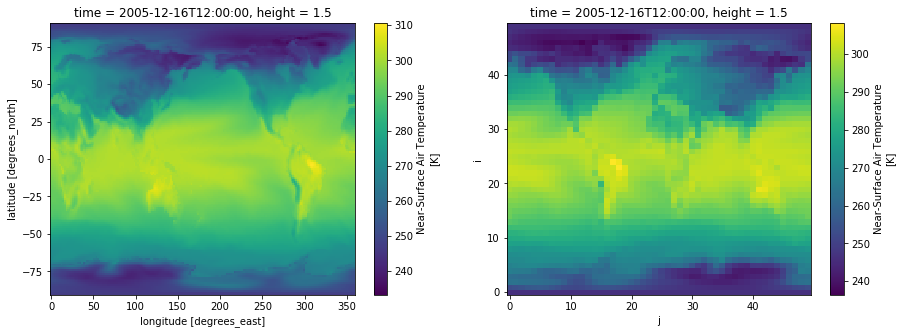

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(121)
ds.tas.isel(time=-1).plot()
plt.subplot(122)
tas_regrid.isel(time=-1).plot()